In [1]:
# SDA_과제#5_4조(신지운, 민영은, 장동규, 조민규)
# ONLY PULL AND PUSH 'SDA.ipynb'!
# 작업 후 Stash란 Summary에 성명을, Description에 작업 내용을 간단하게 요약해서 Commit 해주세요

In [2]:
# About Project
# 프로젝트 목표 : 미세먼지 농도의 변화는 대중교통 이용률에 영향을 미치는가?

# 각 Page별 목적을 여기에 간단히 정리해주세요
# Page는 항상 EDA - 가설검정 - 회귀분석 순서로 내림차순 정렬을 유지해주세요

# Page0 - 필요 패키지 설치
# Page1 - 데이터 년도 선정 과정 및 이유 -> 논의 중
# Page2 - 데이터 준비(미세먼지, 대중교통이용인원 데이터 필터링, column생성 및 데이터 병합 등)
# Page3 - 
# Page4 - 
# Page5 - 
# Page6 - 
# Page7 - 
# Page8 - 
# Page9 - 

In [2]:
# Page0
# import package here!

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

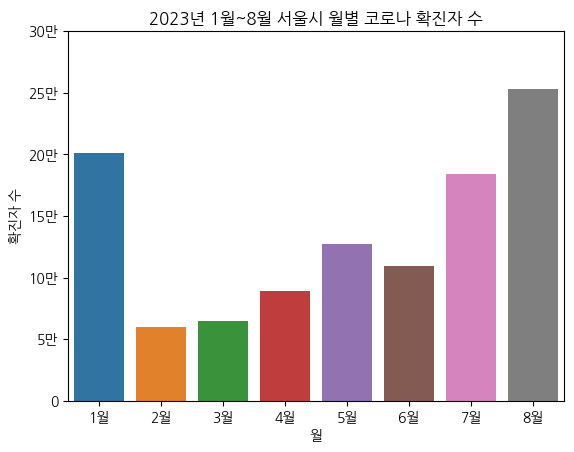

2023년 1월~8월 서울시 월별 코로나 평균 확진자 수: 136203 명


In [3]:
# Page1 - 데이터 년도 선정 과정 및 이유

# 코로나가 대중교통량에 영향을 줄 수도 있다고 판단
# 코로나 국내 첫 감염자 발생 날짜(2020-01-19), 사회적 거리두기 종료 날짜(2022-04-18) 고려
# 코로나 발생 전 연도인 2019년과 사회적 거리두기 종료 후 다음 년도인 2023년 둘 중 하나 선택
# 2023년도 서울시 월 평균 코로나 확진자 수를 확인 후 결정  -> 아예 코로나의 영향을 제외하기 위해 발병 전 가장 최근인 19년도로 선택했다는 어떤가요?

# 2023년도 서울시 1~8월 확진자수 확인(23년 9월부터 코로나 감염병이 4급으로 전환됨에 따라 데이터 업데이트 중단)
data_covid = pd.read_csv("질병관리청_코로나19 시군구별 월별 확진자 및 사망 발생 현황_20230831.csv")
seoul_covid = data_covid.iloc[1,42:50].values
months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월']
seoul_covid_df = pd.DataFrame({'월': months, '확진자 수': [int(val.replace(',', '')) for val in seoul_covid]})
mpl.rcParams['font.family'] = 'NanumGothic'
sns.barplot(data=seoul_covid_df,x="월",y="확진자 수",hue="월")
plt.title("2023년 1월~8월 서울시 월별 코로나 확진자 수")
plt.yticks(ticks=range(0, 300001, 50000),labels=['0', '5만', '10만', '15만', '20만', '25만', '30만'])
plt.show()
print("2023년 1월~8월 서울시 월별 코로나 평균 확진자 수:",round(seoul_covid_df["확진자 수"].mean()),"명")

# 2023년 1월~8월 서울시 월별 평균 확진자 수: 136203
# 2023년 월평균 확진자 수가 13만명 이기에 2023년도 데이터가 아닌 2019년도 데이터로 결정

**19년도 서울시 자치구별, 시간별 미세먼지 데이터
                      일시   구분  미세먼지(PM10)  초미세먼지(PM25)
0       2019-12-31 23:00   평균        23.0         15.0
1       2019-12-31 23:00  강남구        19.0         15.0
2       2019-12-31 23:00  강동구        25.0         18.0
3       2019-12-31 23:00  강북구        25.0         16.0
4       2019-12-31 23:00  강서구        29.0         17.0
...                  ...  ...         ...          ...
227755   2019-01-01 0:00  용산구        31.0         22.0
227756   2019-01-01 0:00  은평구        35.0         23.0
227757   2019-01-01 0:00  종로구        36.0         21.0
227758   2019-01-01 0:00   중구        39.0         26.0
227759   2019-01-01 0:00  중랑구        36.0         26.0

[227760 rows x 4 columns]

**대중교통 운행 시간을 고려한 19년도 서울시 일별 미세먼지 데이터
             날짜  미세먼지(PM10)  초미세먼지(PM25)
0    2019-01-01       37.45        24.55
1    2019-01-02       35.55        22.90
2    2019-01-03       39.95        24.20
3    2019-01-04       61.05        42.25
4    2019-01-05       54.85        31.

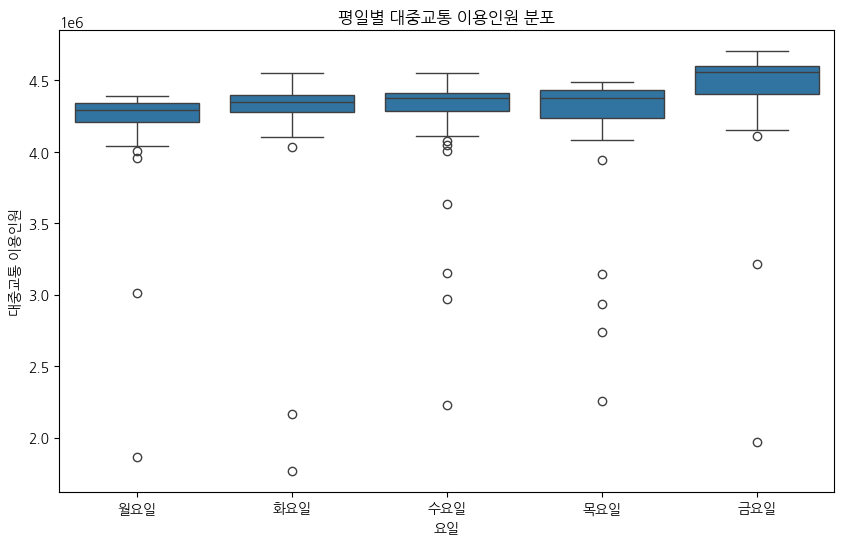

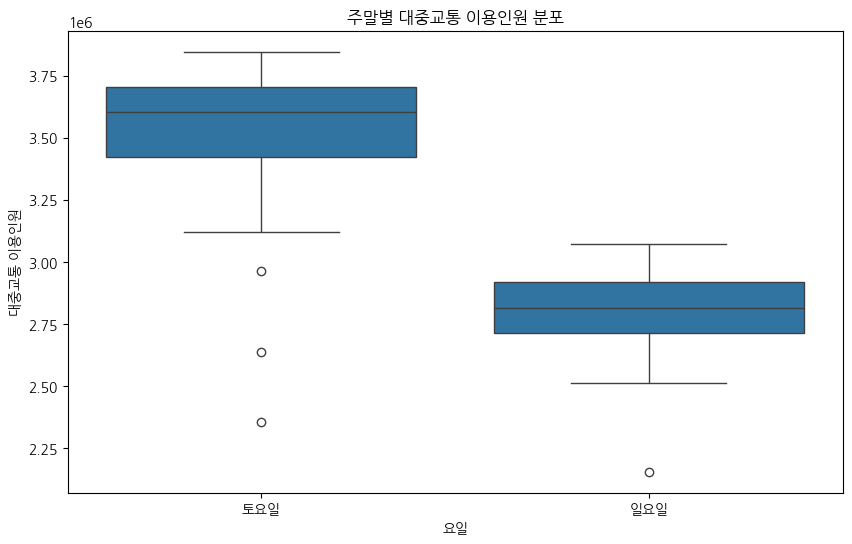

주말 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 대중교통이용인원, 요일, 요일구분]
Index: []
평일 데이터에서 특정 날짜 존재 여부:
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급  대중교통이용인원   요일 요일구분
0   2019-01-01       37.45        24.55      보통       보통   2165112  화요일   평일
35  2019-02-05       90.05        28.15      나쁨       보통   1762754  화요일   평일
255 2019-09-13       14.50         6.45      좋음       좋음   1966346  금요일   평일
---------------after remove outlier--------------------
주말 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 대중교통이용인원, 요일, 요일구분]
Index: []
평일 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 대중교통이용인원, 요일, 요일구분]
Index: []


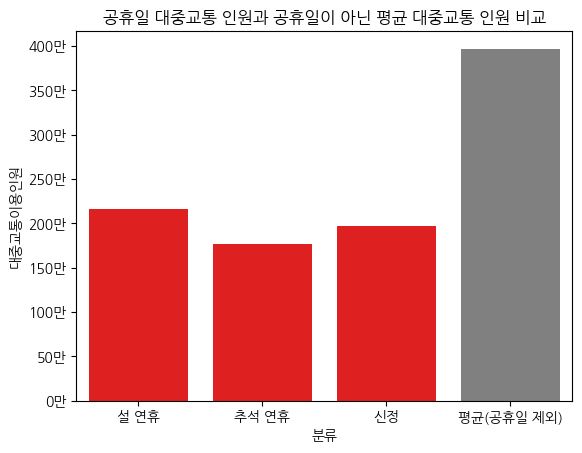

공휴일 평균 대중교통이용 인원: 1964737
공휴일이 아닌 평균 대중교통이용 인원: 3969462
공휴일이 공휴일이 아닌 평균 대중교통 이용 인원의 약 0.49 배

            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급  대중교통이용인원   요일 요일구분
4   2019-01-05       54.85        31.35      보통       보통   3315725  토요일   주말
11  2019-01-12       96.20        69.50      나쁨       나쁨   3395141  토요일   주말
18  2019-01-19       94.80        66.45      나쁨       나쁨   3388418  토요일   주말
25  2019-01-26       43.10        20.35      보통       보통   3430042  토요일   주말
32  2019-02-02       60.75        36.90      보통       나쁨   2962411  토요일   주말
39  2019-02-09       35.00        16.55      보통       보통   3276364  토요일   주말
46  2019-02-16       60.90        49.35      보통       나쁨   3541673  토요일   주말
53  2019-02-23       53.10        37.20      보통       나쁨   3627867  토요일   주말
60  2019-03-02      120.35        83.75      나쁨     매우나쁨   3283133  토요일   주말
67  2019-03-09       45.20        28.95      보통       보통   3683575  토요일   주말
74  2019-03-16       42.25        28.85      보통       보통   

In [18]:
# Page2 - 데이터 준비(미세먼지, 대중교통이용인원 데이터 필터링, column생성 및 데이터 병합 등)

# 19년도 서울시 자치구별, 시간별 미세먼지 데이터 준비
air_df = pd.read_csv("서울시 대기질 자료 제공_2016-2019.csv")
air_df_19 = air_df[air_df['일시'].str.startswith('2019')].copy()
print("**19년도 서울시 자치구별, 시간별 미세먼지 데이터")
print(air_df_19)
#----------------------------------------------------------------------------------------------------

# 하루 미세먼지 농도를 모든 시간대의 평균값으로 사용?
# 대중교통은 새벽 시간대 운행 X, 첫차 시간과 막차 시간을 고려해서 새벽시간대의 미세먼지 데이터를 제거
# 나머지 시간대(05~24시)의 미세먼지 데이터의 평균 값을 하루 미세먼지의 값으로 사용
air_df_19['시간'] = pd.to_datetime(air_df_19['일시']).dt.hour.copy()
air_df_19 = air_df_19[(air_df_19['시간'] >= 5) | (air_df_19['시간'] == 0)]
air_df_19 = air_df_19[air_df_19["구분"] == "평균"].copy()
air_df_19['날짜'] = pd.to_datetime(air_df_19['일시']).dt.date
air_df_19 = air_df_19.groupby(['구분', '날짜'], as_index=False)[['미세먼지(PM10)', '초미세먼지(PM25)']].mean()
air_df_19["미세먼지(PM10)"] = round(air_df_19["미세먼지(PM10)"],2)
air_df_19["초미세먼지(PM25)"] = round(air_df_19["초미세먼지(PM25)"],2)
air_df_19.drop(columns=["구분"],inplace = True)
print("\n**대중교통 운행 시간을 고려한 19년도 서울시 일별 미세먼지 데이터")
print(air_df_19)
#----------------------------------------------------------------------------------------------------

# 미세먼지 농도에 따라 좋음,보통,나쁨,매우나쁨 추가
# 미세먼지(PM10) 기준(0~30: 좋음, 31~80: 보통, 81~150: 나쁨, 151이상: 매우나쁨)
# 초미세먼지(PM25) 기준(0~15: 좋음, 16~35: 보통, 36~75: 나쁨, 76이상: 매우나쁨
def categorize_pm10(value):
    if value <= 30:
        return "좋음"
    elif value <= 80:
        return "보통"
    elif value <= 150:
        return "나쁨"
    else:
        return "매우나쁨"
def categorize_pm25(value):
    if value <= 15:
        return "좋음"
    elif value <= 35:
        return "보통"
    elif value <= 75:
        return "나쁨"
    else:
        return "매우나쁨"
air_df_19["미세먼지 등급"] = air_df_19["미세먼지(PM10)"].apply(categorize_pm10)
air_df_19["초미세먼지 등급"] = air_df_19["초미세먼지(PM25)"].apply(categorize_pm25)
print("\n**미세먼지 농도에 따라 범주화")
print(air_df_19)
#----------------------------------------------------------------------------------------------------

# 19년도 서울시 대중교통이용인원 데이터 준비
transport_df_19 = pd.read_csv("2019_대중교통이용인원.csv")
transport_df_19['날짜'] = pd.to_datetime(transport_df_19['일'].str.split('(').str[0])
transport_df_19 = transport_df_19.drop(columns=['일'])
transport_df_19 = transport_df_19.drop(columns=['시도'])
transport_df_19 = transport_df_19[['날짜', '합계']]
transport_df_19.rename(columns={'합계': '대중교통이용인원'}, inplace=True)
print("\n**19년도 서울시 대중교통이용인원")
print(transport_df_19)
#----------------------------------------------------------------------------------------------------

# 미세먼지와 대중교통이용인원 데이터 병합
air_df_19['날짜'] = pd.to_datetime(air_df_19['날짜'])
transport_df_19['날짜'] = pd.to_datetime(transport_df_19['날짜'])
air_transport_19 = pd.merge(air_df_19, transport_df_19, on='날짜', how='inner')
print("\n**미세먼지, 대중교통이용인원 데이터 병합")
print(air_transport_19)
#----------------------------------------------------------------------------------------------------

# 평일과 주말(토,일) 구분을 위한 요일 column, 요일 구분 column 추가
air_transport_19['요일'] = air_transport_19['날짜'].dt.day_name(locale='ko_KR')
print("\n**평일과 주말(토,일)을 구분하기 위한 요일 column, 요일 구분 column추가")
air_transport_19['요일구분'] = air_transport_19['요일'].apply(lambda x: '주말' if x in ['토요일', '일요일'] else '평일')
print(air_transport_19,"\n")

#----------------------------------------------------------------------------------------------------

# 출퇴근 여부가 대중교통인원에 주는 영향을 고려 해 평일과 주말 데이터를 분리

# air_transport_19: 필터링한 미세먼지,대중교통이용인원 전체 데이터
# air_transport_weekend_19: air_transport_19의 주말 데이터
# air_transport_weekday_19: air_trnasport_19의 평일 데이터
air_transport_weekend_19 = air_transport_19[air_transport_19["요일구분"]=="주말"]
air_transport_weekday_19 = air_transport_19[air_transport_19["요일구분"]=="평일"]
print("**주말 데이터")
print(air_transport_weekend_19)
print("\n**평일 데이터")
print(air_transport_weekday_19)

#----------------------------------------------------------------------------------------------------

# 평일과 주말 각각 데이터 분포 시각화. 이상치 확인

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='대중교통이용인원', data=air_transport_weekday_19, order=['월요일', '화요일', '수요일', '목요일', '금요일'])
plt.title('평일별 대중교통 이용인원 분포')
plt.xlabel('요일')
plt.ylabel('대중교통 이용인원')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='대중교통이용인원', data=air_transport_weekend_19, order=['토요일', '일요일'])
plt.title('주말별 대중교통 이용인원 분포')
plt.xlabel('요일')
plt.ylabel('대중교통 이용인원')
plt.show()

#----------------------------------------------------------------------------------------------------

# 이상치 제거 및 공휴일 확인

specific_dates = ['2019-02-05', '2019-09-13', '2019-01-01'] #확인해볼 공휴일
weekend_check = air_transport_weekend_19[air_transport_weekend_19['날짜'].isin(pd.to_datetime(specific_dates))]
weekday_check = air_transport_weekday_19[air_transport_weekday_19['날짜'].isin(pd.to_datetime(specific_dates))]

print("주말 데이터에서 특정 날짜 존재 여부:")
print(weekend_check)

print("평일 데이터에서 특정 날짜 존재 여부:")
print(weekday_check)

print("---------------after remove outlier--------------------")

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # 1사분위수
    Q3 = data[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

air_transport_weekend_cleaned = remove_outliers(air_transport_weekend_19, '대중교통이용인원')
air_transport_weekday_cleaned = remove_outliers(air_transport_weekday_19, '대중교통이용인원')

weekend_check = air_transport_weekend_cleaned[air_transport_weekend_cleaned['날짜'].isin(pd.to_datetime(specific_dates))]
weekday_check = air_transport_weekday_cleaned[air_transport_weekday_cleaned['날짜'].isin(pd.to_datetime(specific_dates))]

print("주말 데이터에서 특정 날짜 존재 여부:")
print(weekend_check)

print("평일 데이터에서 특정 날짜 존재 여부:")
print(weekday_check)

#----------------------------------------------------------------------------------------------------

# 특정 공휴일(설 연휴, 추석 연휴, 신정)이 대중교통이용인원에 다른 값을 보이는지 barplot을 이용하여 시각화
# 설 연휴: 2019/02/05, 추석 연휴: 2019/9/13, 신정: 2019/01/01
holidays = ['2019-02-05', '2019-09-13', '2019-01-01']
holidays = pd.to_datetime(holidays)
holiday_data = air_transport_19[air_transport_19['날짜'].isin(holidays)][['날짜', '대중교통이용인원']]
average_non_holiday = air_transport_19[~air_transport_19['날짜'].isin(holidays)]['대중교통이용인원'].mean()
bar_data = pd.DataFrame({'분류': ['설 연휴', '추석 연휴', '신정', '평균(공휴일 제외)'],
    '대중교통이용인원': list(holiday_data['대중교통이용인원']) + [average_non_holiday]})
sns.barplot(data = bar_data, x = "분류", y = "대중교통이용인원", palette=["red","red","red","gray"],hue="분류",legend=False)
max_value = bar_data['대중교통이용인원'].max()
step = 500000  
plt.yticks(ticks=range(0, int(max_value) + step, step),labels=[f'{x//10000}만' for x in range(0, int(max_value) + step, step)])
plt.title("공휴일 대중교통 인원과 공휴일이 아닌 평균 대중교통 인원 비교")
plt.show()
print("공휴일 평균 대중교통이용 인원:",round(holiday_data["대중교통이용인원"].mean()))
print("공휴일이 아닌 평균 대중교통이용 인원:",round(average_non_holiday))
print("공휴일이 공휴일이 아닌 평균 대중교통 이용 인원의 약",round(holiday_data["대중교통이용인원"].mean()/(average_non_holiday),2),
      "배\n")

#----------------------------------------------------------------------------------------------------------

#boxplot에 따른 토요일, 일요일 구분

air_transport_weekend_cleaned_sat = air_transport_weekend_cleaned[air_transport_weekend_cleaned["요일"]=="토요일"]
air_transport_weekend_cleaned_sun = air_transport_weekend_cleaned[air_transport_weekend_cleaned["요일"]=="일요일"]

print(air_transport_weekend_cleaned_sat)
print(air_transport_weekend_cleaned_sun)

In [6]:
# Page3

In [7]:
# Page4

In [8]:
# Page5

In [9]:
# Page6

In [10]:
# Page7

In [11]:
# Page8

In [12]:
# Page9